In [47]:
data_path = 'dataset 2/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
data = pd.read_csv(data_path)
data.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


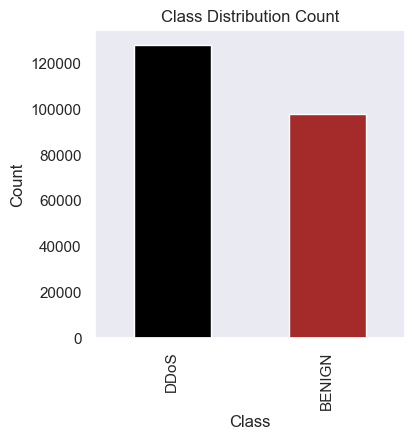

In [49]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.set_theme(style="darkgrid") 
plt.figure(figsize=(4,4))
data[' Label'].value_counts().plot(kind='bar', color=['black', 'brown'])
plt.title('Class Distribution Count')
plt.ylabel('Count')
plt.xlabel('Class')
plt.grid()

In [52]:
# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

# stripping columns.... 
new_col = {}
for col in data.columns: 
    new_col[col] = col.strip()

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [44]:
# initializaing DBN
dbn = DBN_network()
# configure the DBN... 
dbn.config_network([84, 84, 42, 42, 12], layers=5, learning_rate=0.09455)

# showing the DBN architecture.. 
dbn.summary()

parameter initialize...
DBN architecture Summary


Pipeline(steps=[('layer_1',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_2',
                 BernoulliRBM(learning_rate=0.09455, n_components=84, n_iter=4,
                              verbose=1)),
                ('layer_3',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_4',
                 BernoulliRBM(learning_rate=0.09455, n_components=42, n_iter=4,
                              verbose=1)),
                ('layer_5',
                 BernoulliRBM(learning_rate=0.09455, n_components=12, n_iter=4,
                              verbose=1)),
                ('layer_6', RandomForestClassifier())])

In [45]:
# training the arhitecture
strt_time = time.time()
dbn.fit_model(X_train, y_train)
stop_time = time.time()

data_1_total_training_time = stop_time - strt_time
print('Total Training Time : ', data_1_total_training_time)

Training For 5 Layer

 *******************  EPOCH 1 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -4.00, time = 4.60s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3.70, time = 5.40s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -4.03, time = 5.24s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -4.04, time = 5.35s

 *******************  EPOCH 2 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -15.53, time = 4.14s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -15.59, time = 6.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -15.34, time = 5.66s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -15.90, time = 6.37s

 *******************  EPOCH 3 **********************
[BernoulliRBM] Iteration 1, pseudo-likelihood = -3.56, time = 3.43s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -3.70, time = 3.88s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -3.84, time = 3.57s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -3.62, time = 3.6

Calculated Feature (37047, 84)
Calculated Feature (37047, 84)
Calculated Feature (37047, 42)
Calculated Feature (37047, 42)
Calculated Feature (37047, 12)

EXE TIME
Total Detection Time : 1.329992
AVG Detection Time : 0.00003590 



c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

               precision    recall  f1-score   support

       Benign       0.95      0.37      0.53      2315
   DrDoS_LDAP       0.00      0.00      0.00      2316
  DrDoS_MSSQL       0.00      0.00      0.00      2316
    DrDoS_NTP       0.00      0.00      0.00      2316
DrDoS_NetBIOS       0.61      0.01      0.01      2315
   DrDoS_SNMP       0.00      0.00      0.00      2315
    DrDoS_UDP       0.08      1.00      0.15      2315
         LDAP       0.00      0.00      0.00      2316
        MSSQL       0.00      0.00      0.00      2315
      NetBIOS       0.39      0.01      0.02      2316
      Portmap       0.99      0.15      0.26      2316
          Syn       0.57      0.99      0.72      2315
         TFTP       0.00      0.00      0.00      2315
          UDP       0.00      0.00      0.00      2315
      UDP-lag       0.72      0.01      0.02      2315
      WebDDoS       0.74      0.99      0.85      2316

     accuracy                           0.22     37047
    macr

<Axes: >

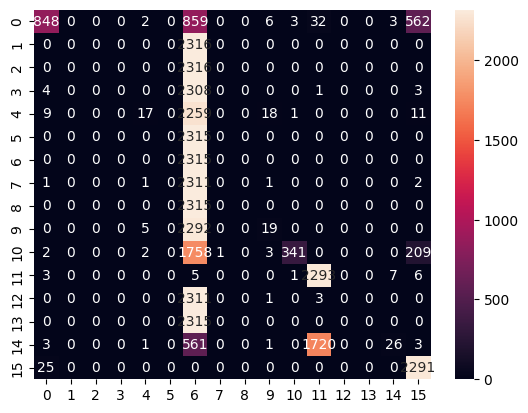

In [35]:
# machine learning developement
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,f1_score
import pandas as pd
import os
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
import seaborn as sn 
from matplotlib import pyplot as plt